## A/B testing

The companies are interested in answering two questions:

* Would the campaign be successful?
* If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be. 

The data structure is the following:

* Index: Row index
* user id: User ID (unique)
* test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
* converted: If a person bought the product then True, else is False
* total ads: Amount of ads seen by person
* most ads day: Day that the person saw the biggest amount of ads
* most ads hour: Hour of day that the person saw the biggest amount of ads

credits : *https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing*

In [1]:
# Importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Levantamos el dataset que vamos a utilizar
df = pd.read_csv("../data/marketing_AB.csv")
df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
# Chequeamos duplicados
df.duplicated(subset=['user id']).sum()

0

In [4]:
# Vemos el tamaño de la muestra
df.shape

(588101, 7)

In [5]:
# Eliminamos la primera columna que es un indice
df.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
# Ahora lo que hacemos es chequear los distintos labels de las variables categóricas
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [7]:
# Vemos todos los labels de cada categoría
for i in df_cat.columns:
    print(i.upper(), ":", df[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Análisis univariado de cada una de las variables

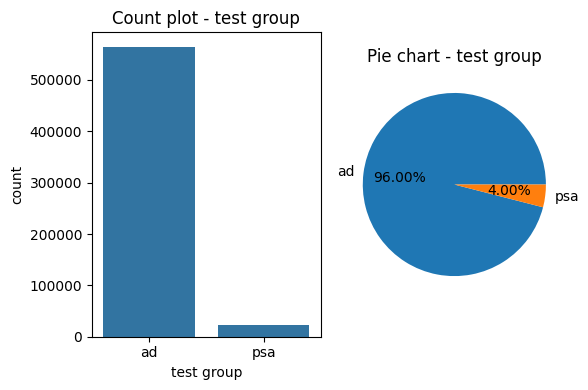

In [8]:
# Seleccionamos la variable a analizar
variable = 'test group'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data= df_cat)
plt.title(f'Count plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

# Ajustamos el layout
plt.tight_layout()

# Mostramos los gráficos
plt.show()

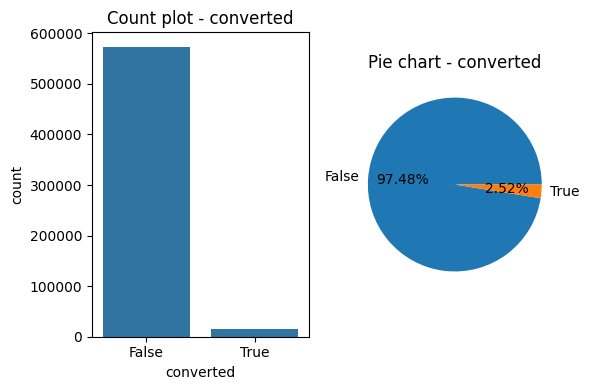

In [9]:
# Seleccionamos la variable a analizar
variable = 'converted'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data= df_cat)
plt.title(f'Count plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

# Ajustamos el layout
plt.tight_layout()

# Mostramos los gráficos
plt.show()

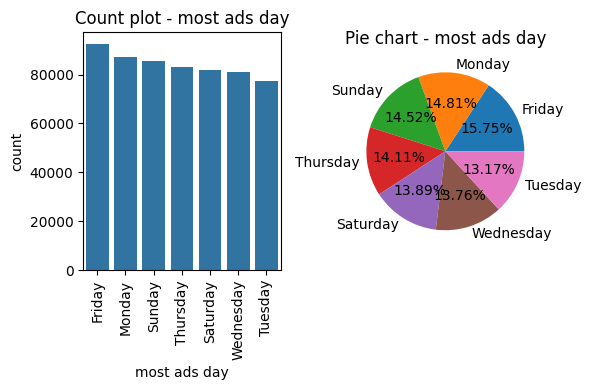

In [10]:
# Seleccionamos la variable a analizar
variable = 'most ads day'

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data= df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

# Ajustamos el layout
plt.tight_layout()

# Mostramos los gráficos
plt.show()

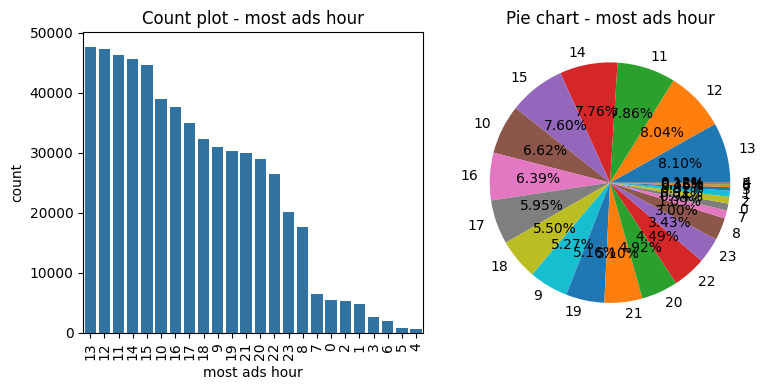

In [11]:
# Seleccionamos la variable a analizar
variable = 'most ads hour'

plt.figure(figsize=(8,4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data= df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count plot - {variable}')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie chart - {variable}')

# Ajustamos el layout
plt.tight_layout()

# Mostramos los gráficos
plt.show()

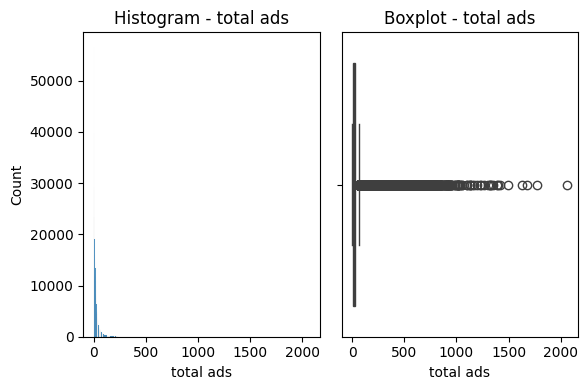

In [12]:
# Seleccionamos la variable a analizar
variable = 'total ads'

plt.figure(figsize=(6,4))
# Hist plot
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data= df)
plt.title(f'Histogram - {variable}')

# boxplot chart
plt.subplot(1, 2, 2)
sns.boxplot(x=variable, data = df)
plt.title(f'Boxplot - {variable}')

# Ajustamos el layout
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [13]:
# Vemos la estadísitca descriptiva de la variable numérida
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

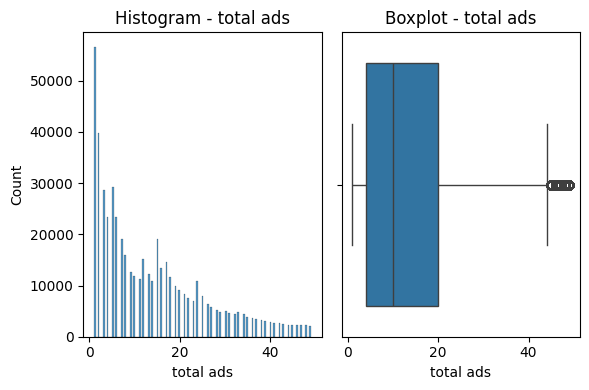

In [14]:
# Como tenemos una cola muy larga hacia la derecha vamos a filtrar el dataset para visualizarlo mejor
# Seleccionamos la variable a analizar
variable = 'total ads'

plt.figure(figsize=(6,4))
# Hist plot
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data= df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

# boxplot chart
plt.subplot(1, 2, 2)
sns.boxplot(x=variable, data = df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

# Ajustamos el layout
plt.tight_layout()

# Mostramos los gráficos
plt.show()

### Análisis bivariado de las variables

In [15]:
# Creamos un cuadro de crosstab para comparar con nuestra variable dependiente "converted"
conversion_test = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
conversion_test

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


In [16]:
# Creamos un cuadro de crosstab para comparar con nuestra variable dependiente "converted"
conversion_test_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
conversion_test_day.sort_values(by= True, ascending = False)

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


In [17]:
# Creamos un cuadro de crosstab para comparar con nuestra variable dependiente "converted"
conversion_test_day = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
conversion_test_day.sort_values(by= True, ascending = False)

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


<Axes: xlabel='converted', ylabel='total ads'>

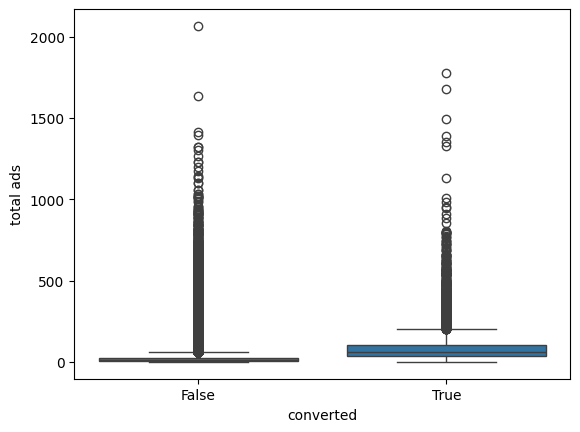

In [18]:
# Ahora lo que hacemos es graficar la tasa de conversión vs total_ads
sns.boxplot(x = 'converted', y = 'total ads', data=df)

<Axes: xlabel='converted', ylabel='total ads'>

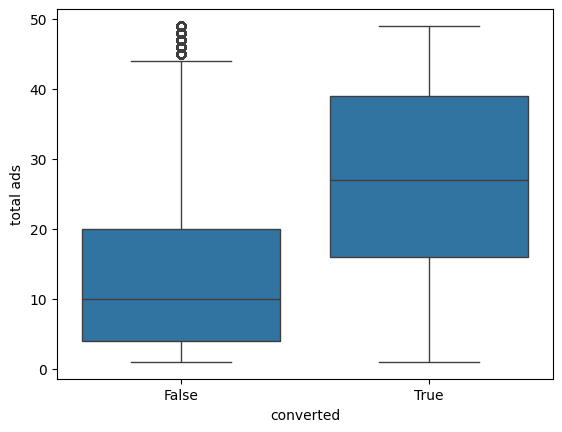

In [19]:
# Ahora lo que hacemos es graficar la tasa de conversión vs total_ads
sns.boxplot(x = 'converted', y = 'total ads', data=df[df['total ads'] < 50])

### Realizamos el test de hipótesis

In [20]:
# Lo primero que hacemos es un test de chi cuadrado para testear las relaciones entre variable categóricas
from scipy.stats import chi2_contingency
alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        # Creamos la tabla de contingencias
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        # Realizamos el test de chi cuadrado
        chi2, p, _, _ = chi2_contingency(contingency_table)
        # mostramos los resultados
        print(f"\n Chi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")
        # chequeamos la significancia del test
        if p < alpha:
            print(f"La diferencia en las tasas de conversión sobre la variable {variable} son significativas")
        else:
            print(f"No existen diferencias significativas en las tasas de conversión sobre la variable {variable}")


 Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
La diferencia en las tasas de conversión sobre la variable test group son significativas

 Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
La diferencia en las tasas de conversión sobre la variable most ads day son significativas

 Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
La diferencia en las tasas de conversión sobre la variable most ads hour son significativas


In [21]:
# Con le objetivo de ver que test de hipótesis aplicar tenemos que chequear los supuestos fundamentales entre ambos grupos
import pingouin as pg

# Test de normalidad Shapiro-Wilk
shapiro_true = pg.normality(data=df[df['converted'] == True]['total ads'], method = 'shapiro')
shapiro_false = pg.normality(data=df[df['converted'] == False]['total ads'], method = 'shapiro')

# Imprimimos los resultados
print('Shapiro test para evaluar la normalidad del grupo que logró la conversión: p-value = ' + str(shapiro_true['pval']))
print('\n')
print('Shapiro test para evaluar la normalidad del grupo que no logró la conversión: p-value = ' + str(shapiro_false['pval']))
print('\n')

# Test de homocedasticidad
# En este caso estamos viendo si la varianza entre grupos es igual para ver si vienen de la misma distribución (normal) poblacional
# ==============================================================================
results_levene = pg.homoscedasticity(data=df, dv='total ads', group='converted', method='levene')
print('Levene test para evaluar la homocedasticidad entre ambas muestras: p-value = ' + str(results_levene['pval']))

Shapiro test para evaluar la normalidad del grupo que logró la conversión: p-value = total ads    1.638681e-98
Name: pval, dtype: float64


Shapiro test para evaluar la normalidad del grupo que no logró la conversión: p-value = total ads    9.883049e-204
Name: pval, dtype: float64


Levene test para evaluar la homocedasticidad entre ambas muestras: p-value = levene    0.0
Name: pval, dtype: float64


/home/lautipintos/Documentos/MachineLearning_101/env/lib/python3.11/site-packages/pingouin/distribution.py:230: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  stats = numdata.apply(lambda x: func(x.dropna()), result_type="expand", axis=0).T
/home/lautipintos/Documentos/MachineLearning_101/env/lib/python3.11/site-packages/pingouin/distribution.py:230: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  stats = numdata.apply(lambda x: func(x.dropna()), result_type="expand", axis=0).T


In [22]:
# En este caso como no podemos garantizar ni la normalidad ni la homocedasticidad entre muestras tenemos que utilizar un U-Test y no un t-test
# pg.mwu(x=df[df['converted'] == True]['total ads'], y=df[df['converted'] == False]['total ads'])
from scipy.stats import mannwhitneyu

u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f'Mann-Whitney U test: p-value = {u_p_value}')

Mann-Whitney U test: p-value = 0.0


#### Conclusiones:

En este caso como tenemos un p-value < 0.05 rechazamos la hipótesis nulas de que ambas probabilidades son iguales y si existe una diferencia significativa en las probabilidad de conversión en función del total ads. Esto se visualiza facilmente en las medianas de ambos grupos en relación al boxplot del bloque 19. Lo único que hicimos ahora fue confirmarlo estadísticamente.